# Getting Started with Matplotlib

Why are we using Pandas? 

Pandas actually has a few functions that are similar to D3 functions. So, we can learn two things at the same time. 

In [1]:
import matplotlib.pyplot as plt
import pandas as pd

### Getting the data

In [2]:
url="https://gist.githubusercontent.com/dudaspm/e518430a731ac11f52de9217311c674d/raw/4c2f2bd6639582a420ef321493188deebc4a575e/StateCollege2000-2020.csv"
data = []
data=pd.read_csv(url)
data = data.fillna(0) # replace all NAs with 0s

### Viewing the data

In [3]:
data.head()

,DATE,DAY,MONTH,YEAR,PRCP,SNOW,TMAX,TMIN,WT_FOG,WT_THUNDER,WT_SLEET,WT_HAIL,WT_GLAZE,WT_HIGHWINDS
0,1/1/2000,1,1,2000,0.00,0.0,44.0,23,0.0,0.0,0.0,0.0,0.0,0.0
1,1/2/2000,2,1,2000,0.00,0.0,52.0,23,0.0,0.0,0.0,0.0,0.0,0.0
2,1/3/2000,3,1,2000,0.01,0.0,60.0,35,0.0,0.0,0.0,0.0,0.0,0.0
3,1/4/2000,4,1,2000,0.12,0.0,62.0,54,0.0,0.0,0.0,0.0,0.0,0.0
4,1/5/2000,5,1,2000,0.04,0.0,60.0,30,0.0,0.0,0.0,0.0,0.0,0.0


### Acknowledgement 

<cite>Cite as: Menne, Matthew J., Imke Durre, Bryant Korzeniewski, Shelley McNeal, Kristy Thomas, Xungang Yin, Steven Anthony, Ron Ray, Russell S. Vose, Byron E.Gleason, and Tamara G. Houston (2012): Global Historical Climatology Network - Daily (GHCN-Daily), Version 3. CITY:US420020. NOAA National Climatic Data Center. doi:10.7289/V5D21VHZ 02/22/2021. 

Publications citing this dataset should also cite the following article: Matthew J. Menne, Imke Durre, Russell S. Vose, Byron E. Gleason, and Tamara G. Houston, 2012: An Overview of the Global Historical Climatology Network-Daily Database. J. Atmos. Oceanic Technol., 29, 897-910. doi:10.1175/JTECH-D-11-00103.1. 

Use liability: NOAA and NCEI cannot provide any warranty as to the accuracy, reliability, or completeness of furnished data. Users assume responsibility to determine the usability of these data. The user is responsible for the results of any application of this data for other than its intended purpose.</cite>

Links:
https://data.noaa.gov/onestop/

https://www.ncdc.noaa.gov/cdo-web/search

### Correlation

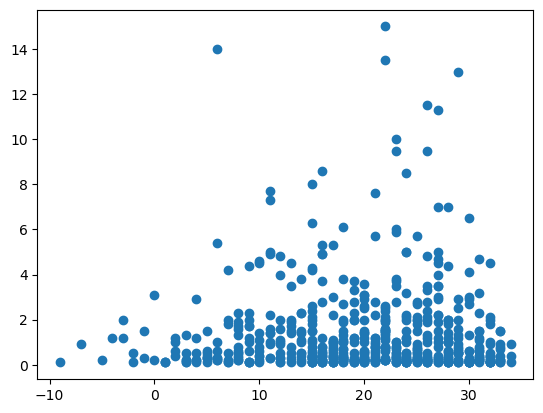

In [4]:
import matplotlib.pyplot as plt
snowdays = data[(data.SNOW>0)]

plt.scatter(snowdays.TMIN, snowdays.SNOW)
plt.show()

## Making Plots

### Change Over Time

Note: I worked with Adam Lavely on these notebook, so a big thank you to Adam for helping!

This section covers making plots and doing several basic things:
* Adding gridlines and a legend
* Changing the way the data is shown (linestyles and marker types)
* Adding titles and axis labels
* Creating multiple plots within the same figure
* Adding text to the plots
* Saving the plot to be used outside of the Jupyter environment
* Using the rcParams package to create uniform plots

### Basic Plots

![Anatomy of a Figure](https://matplotlib.org/stable/_images/anatomy.png)

> Usage Guide — Matplotlib 3.3.4 documentation. (n.d.). MatPlotLib. Retrieved February 25, 2021, from https://matplotlib.org/stable/tutorials/introductory/usage.html

Plots are ways of showing data.  We will use pyplot from the matplotlib library as it is simple and common.

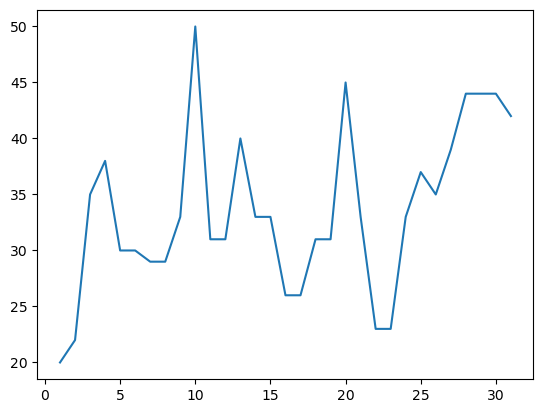

In [5]:
import matplotlib.pyplot as plt

# Some data for us to plot
xVals = data[(data.MONTH==3) & (data.YEAR==2020)].DAY #independent
yVals = data[(data.MONTH==3) & (data.YEAR==2020)].TMIN #dependent

# Creat the figure
fig, ax = plt.subplots(1)

# Put the data on the plot
ax.plot( xVals, yVals )

# Show the figure (here in Jupyter)
plt.show( fig )
plt.close( fig )

This seems very simple and basic, but let's discuss the objects here to more easily understand how to add new things.  
* We're importing a the matplotlib.pyplot module, which gives us access to functions like subplots. 
* When subplots is called without any arguments, a single plot is made 
* We have an internal name for our figure (fig) and identify the specific set of axes (ax) we are using (this allows us to have multiple subplots on the same figure)
* We can then add things - think about if we are acting on the whole figure, or the individual subplot

We can add things like labels and a title to help provide context.

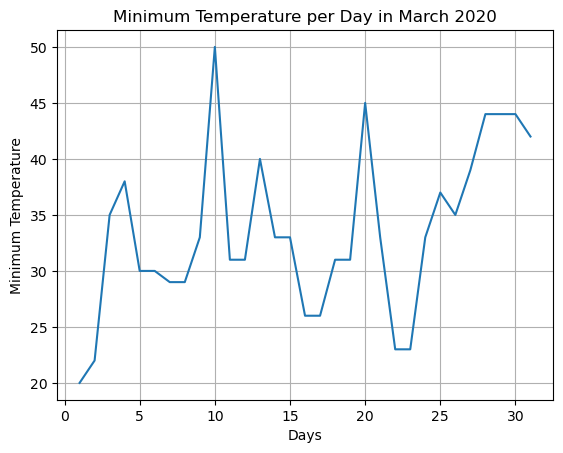

In [6]:
import matplotlib.pyplot as plt

# Some data for us to plot
xVals = data[(data.MONTH==3) & (data.YEAR==2020)].DAY #independent
yVals = data[(data.MONTH==3) & (data.YEAR==2020)].TMIN #dependent

# Creat the figure
fig, ax = plt.subplots(1)

# Put the data on the plot
ax.plot( xVals, yVals )

# Add labels, a title and grid lines to the plot
ax.set_xlabel( 'Days' )
ax.set_ylabel( 'Minimum Temperature' )
plt.title( 'Minimum Temperature per Day in March 2020' )
ax.grid()

# Show the figure (here in Jupyter)
plt.show( fig )
plt.close( fig )

We can change how the data is shown on the plot.  Some common things to change are linestyle, color and marker. Look at https://matplotlib.org/api/_as_gen/matplotlib.pyplot.plot.html#matplotlib.pyplot.plot for a complete list of options and https://matplotlib.org/2.0.2/examples/color/named_colors.html for the named colors.

You can either specify these things individually, or with shorthand notation

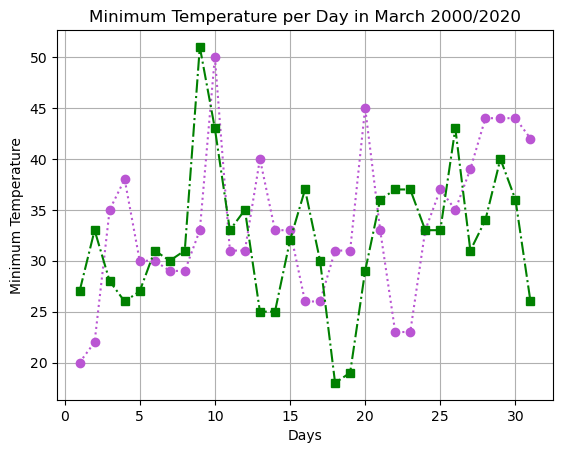

In [7]:
import matplotlib.pyplot as plt

# Some data for us to plot
xVals = data[(data.MONTH==3) & (data.YEAR==2020)].DAY # independent
yVals = data[(data.MONTH==3) & (data.YEAR==2020)].TMIN # dependent
zVals = data[(data.MONTH==3) & (data.YEAR==2000)].TMIN # dependent

# Creat the figure
fig, ax = plt.subplots(1)

# Add our data and change the color, marker type and linestyle
ax.plot( xVals, yVals, color='mediumorchid', marker='o', linestyle=':' )
ax.plot( xVals, zVals, 'gs-.' )

# Add labels, a title and grid lines to the plot
ax.set_xlabel( 'Days' )
ax.set_ylabel( 'Minimum Temperature' )
plt.title( 'Minimum Temperature per Day in March 2000/2020' )
ax.grid()

# Show the figure (here in Jupyter)
plt.show( fig )
plt.close( fig )

We can also add legends and text to our figures.  

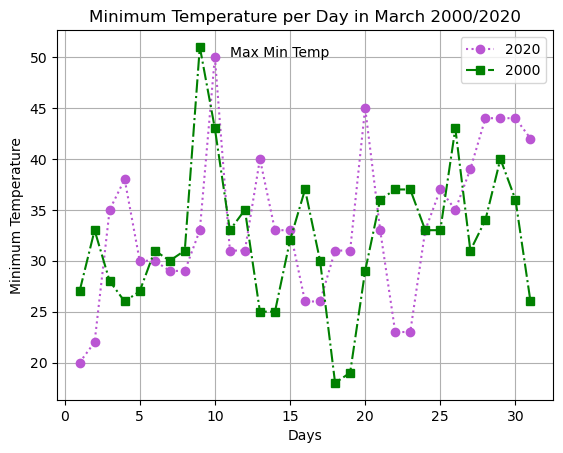

In [8]:
import matplotlib.pyplot as plt

# Some data for us to plot
xVals = data[(data.MONTH==3) & (data.YEAR==2020)].DAY # independent
yVals = data[(data.MONTH==3) & (data.YEAR==2020)].TMIN # dependent
zVals = data[(data.MONTH==3) & (data.YEAR==2000)].TMIN # dependent

# Creat the figure
fig, ax = plt.subplots(1)

# Add our data and change the color, marker type and linestyle
ax.plot( xVals, yVals, color='mediumorchid', marker='o', linestyle=':',  label = '2020')
ax.plot( xVals, zVals, 'gs-.',  label = '2000')

# Add some text; note the starting point and rotation
plt.text( 11, 50,'Max Min Temp' )

# Add labels, a title and grid lines to the plot
ax.set_xlabel( 'Days' )
ax.set_ylabel( 'Minimum Temperature' )
plt.title( 'Minimum Temperature per Day in March 2000/2020' )
ax.grid()

# Put in the legend - we put it in location 2 (top left)
ax.legend( loc = 0)

# Show the figure (here in Jupyter)
plt.show( fig )
plt.close( fig )

### Multiple plots on the same figure

Let's take advantage of adding an additional subplot, and change the y-axes of the different plots separately. We use the sharex to indicate that the x-axes should be the same.  Note that the figure handle refers to the entire figure and the axes are individual sets of axes that occur within the figure.

Type of figd:, <class 'matplotlib.figure.Figure'>
Type of axA: <class 'matplotlib.axes._axes.Axes'>


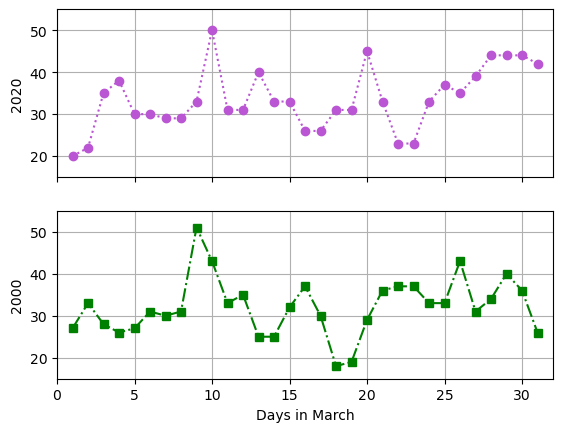

In [9]:
import matplotlib.pyplot as plt

# Some data for us to plot
xVals = data[(data.MONTH==3) & (data.YEAR==2020)].DAY # independent
yVals = data[(data.MONTH==3) & (data.YEAR==2020)].TMIN # dependent
zVals = data[(data.MONTH==3) & (data.YEAR==2000)].TMIN # dependent

# Create the figure.  Note that there are two plots here, and that they share the x axes
figd, [axA, axB]  = plt.subplots( 2, sharex = True )
print(  "Type of figd:,",type(figd) )
print( "Type of axA:", type(axA) )

# Add data to the plots.  note that we add to the subplot we desire
axA.plot( xVals, yVals, color = 'mediumorchid', marker = 'o', linestyle = ':' )
axB.plot( xVals, zVals, 'gs-.' )

# Add the axis labels and grid
axA.set_ylabel( '2020' )
axB.set_ylabel( '2000' )
axB.set_xlabel( 'Days in March' )
axA.grid()
axB.grid()

# Set some axis limits - note we only have to set X once
axA.set_xlim( [ 0 , 32 ] )
axA.set_ylim( [ 15, 55 ] )
axB.set_ylim( [ 15, 55 ] )

# Show the figure in the Jupyter environment
plt.show( figd )
plt.close( figd )

### Saving the file to use later

NOTE: this may require one more step in Google Colab

Everything so far has just been in the jupyter notebook environment.  We can save the files using the savefig function.  You can then use the Home tab within jupyter to download the file to your local machine.

Type of figd:, <class 'matplotlib.figure.Figure'>
Type of axA: <class 'matplotlib.axes._axes.Axes'>


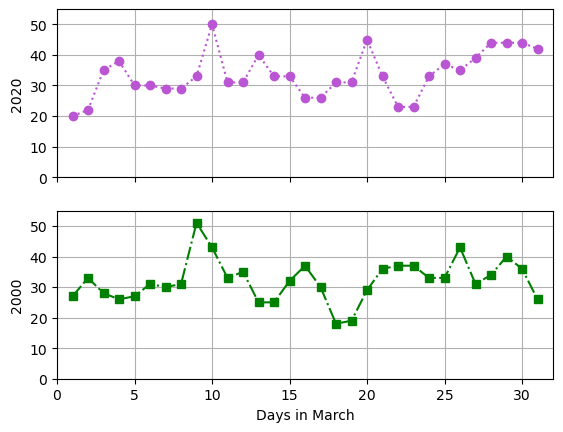

In [10]:
import matplotlib.pyplot as plt

# Some data for us to plot
xVals = data[(data.MONTH==3) & (data.YEAR==2020)].DAY # independent
yVals = data[(data.MONTH==3) & (data.YEAR==2020)].TMIN # dependent
zVals = data[(data.MONTH==3) & (data.YEAR==2000)].TMIN # dependent

# Create the figure.  Note that there are two plots here, and that they share the x axes
figd, [axA, axB]  = plt.subplots( 2, sharex = True )
print(  "Type of figd:,",type(figd) )
print( "Type of axA:", type(axA) )

# Add data to the plots.  note that we add to the subplot we desire
axA.plot( xVals, yVals, color = 'mediumorchid', marker = 'o', linestyle = ':' )
axB.plot( xVals, zVals, 'gs-.' )

# Add the axis labels and grid
axA.set_ylabel( '2020' )
axB.set_ylabel( '2000' )
axB.set_xlabel( 'Days in March' )
axA.grid()
axB.grid()

# Set some axis limits - note we only have to set X once
axA.set_xlim( [ 0 , 32 ] )
axA.set_ylim( [ 0, 55 ] )
axB.set_ylim( [ 0, 55 ] )

# Save the figure so that we have access to it outside of Jupyter
plt.savefig( 'MarchWeather.png' )

# Save the figure so that we have access to it outside of Jupyter
plt.savefig( 'MarchWeather.svg' )

# Show the figure in the Jupyter environment
plt.show( figd )
plt.close( figd )

### Publication Quality Plots

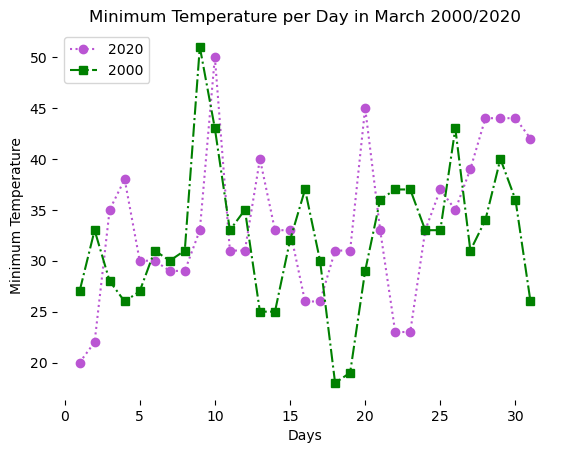

In [11]:
import matplotlib.pyplot as plt

# Some data for us to plot
xVals = data[(data.MONTH==3) & (data.YEAR==2020)].DAY # independent
yVals = data[(data.MONTH==3) & (data.YEAR==2020)].TMIN # dependent
zVals = data[(data.MONTH==3) & (data.YEAR==2000)].TMIN # dependent

# Creat the figure
fig, ax = plt.subplots(1)

# Add our data and change the color, marker type and linestyle
ax.plot( xVals, yVals, color='mediumorchid', marker='o', linestyle=':',  label = '2020')
ax.plot( xVals, zVals, 'gs-.',  label = '2000')

# Add labels, a title and grid lines to the plot
ax.set_xlabel( 'Days' )
ax.set_ylabel( 'Minimum Temperature' )
plt.title( 'Minimum Temperature per Day in March 2000/2020' )

###################################################
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['bottom'].set_visible(False)
ax.spines['left'].set_visible(False)
###################################################

# Put in the legend - we put it in location 2 (top left)
ax.legend( loc = 2 )

# Show the figure (here in Jupyter)
plt.show( fig )
plt.close( fig )

Next, I want to move the labels to the end of the lines. 

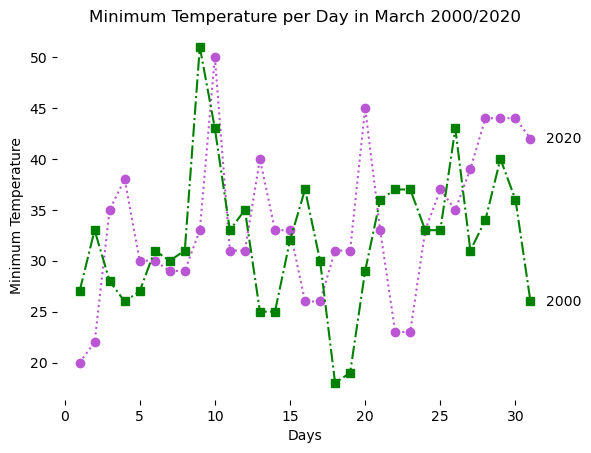

In [12]:
import matplotlib.pyplot as plt

# Some data for us to plot
xVals = data[(data.MONTH==3) & (data.YEAR==2020)].DAY # independent
yVals = data[(data.MONTH==3) & (data.YEAR==2020)].TMIN # dependent
zVals = data[(data.MONTH==3) & (data.YEAR==2000)].TMIN # dependent

# Creat the figure
fig, ax = plt.subplots(1)

# Add our data and change the color, marker type and linestyle
ax.plot( xVals, yVals, color='mediumorchid', marker='o', linestyle=':',  label = '2020')
ax.plot( xVals, zVals, 'gs-.',  label = '2000')

# Add labels, a title and grid lines to the plot
ax.set_xlabel( 'Days' )
ax.set_ylabel( 'Minimum Temperature' )
plt.title( 'Minimum Temperature per Day in March 2000/2020' )

ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['bottom'].set_visible(False)
ax.spines['left'].set_visible(False)

###################################################
ax.text(32, yVals.iloc[-1], '2020', horizontalalignment='left', verticalalignment='center')
ax.text(32, zVals.iloc[-1], '2000', horizontalalignment='left', verticalalignment='center')
###################################################


# Show the figure (here in Jupyter)
plt.show( fig )
plt.close( fig )

Let's make the Axis Titles larger

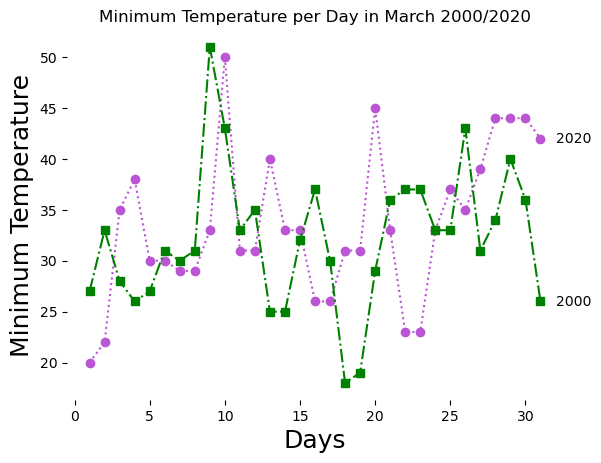

In [13]:
import matplotlib.pyplot as plt

# Some data for us to plot
xVals = data[(data.MONTH==3) & (data.YEAR==2020)].DAY # independent
yVals = data[(data.MONTH==3) & (data.YEAR==2020)].TMIN # dependent
zVals = data[(data.MONTH==3) & (data.YEAR==2000)].TMIN # dependent

# Creat the figure
fig, ax = plt.subplots(1)

# Add our data and change the color, marker type and linestyle
ax.plot( xVals, yVals, color='mediumorchid', marker='o', linestyle=':',  label = '2020')
ax.plot( xVals, zVals, 'gs-.',  label = '2000')

###################################################
# Add labels, a title and grid lines to the plot
ax.set_xlabel( 'Days' , fontsize=18)
ax.set_ylabel( 'Minimum Temperature' , fontsize=18)
plt.title( 'Minimum Temperature per Day in March 2000/2020' )
###################################################
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['bottom'].set_visible(False)
ax.spines['left'].set_visible(False)

ax.text(32, yVals.iloc[-1], '2020', horizontalalignment='left', verticalalignment='center')
ax.text(32, zVals.iloc[-1], '2000', horizontalalignment='left', verticalalignment='center')

# Show the figure (here in Jupyter)
plt.show( fig )
plt.close( fig )

Considering we moved the legend titles to the end of each line. This might not be as important, but if wanted to get some "print friendly colors," we should use colorbrewer. 

https://scitools.org.uk/iris/docs/v1.1/userguide/plotting_a_cube.html#brewer-colour-palettes

http://colorbrewer2.org

In [14]:
import matplotlib.cm as brewer
for colors in brewer.datad:
    print( colors )

Blues
BrBG
BuGn
BuPu
CMRmap
GnBu
Greens
Greys
OrRd
Oranges
PRGn
PiYG
PuBu
PuBuGn
PuOr
PuRd
Purples
RdBu
RdGy
RdPu
RdYlBu
RdYlGn
Reds
Spectral
Wistia
YlGn
YlGnBu
YlOrBr
YlOrRd
afmhot
autumn
binary
bone
brg
bwr
cool
coolwarm
copper
cubehelix
flag
gist_earth
gist_gray
gist_heat
gist_ncar
gist_rainbow
gist_stern
gist_yarg
gnuplot
gnuplot2
gray
hot
hsv
jet
nipy_spectral
ocean
pink
prism
rainbow
seismic
spring
summer
terrain
winter
Accent
Dark2
Paired
Pastel1
Pastel2
Set1
Set2
Set3
tab10
tab20
tab20b
tab20c


/tmp/ipykernel_3521/2983359897.py:10: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed in 3.11. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap()`` or ``pyplot.get_cmap()`` instead.
  colors = brewer.get_cmap('Set1',2)


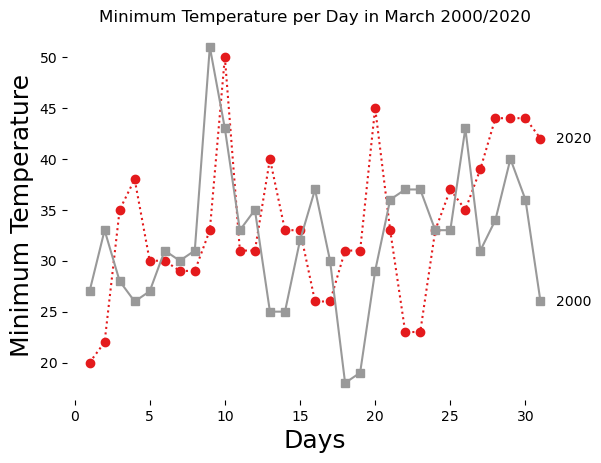

In [15]:
import matplotlib.pyplot as plt

# Some data for us to plot
xVals = data[(data.MONTH==3) & (data.YEAR==2020)].DAY # independent
yVals = data[(data.MONTH==3) & (data.YEAR==2020)].TMIN # dependent
zVals = data[(data.MONTH==3) & (data.YEAR==2000)].TMIN # dependent

# Creat the figure
fig, ax = plt.subplots(1)
colors = brewer.get_cmap('Set1',2)
# Add our data and change the color, marker type and linestyle
ax.plot( xVals, yVals, marker='o', linestyle=':',  label = '2020', color=colors(0))
ax.plot( xVals, zVals, marker='s', linestyle='-',  label = '2000', color=colors(1))

# Add labels, a title and grid lines to the plot
ax.set_xlabel( 'Days' , fontsize=18)
ax.set_ylabel( 'Minimum Temperature' , fontsize=18)
plt.title( 'Minimum Temperature per Day in March 2000/2020' )

ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['bottom'].set_visible(False)
ax.spines['left'].set_visible(False)

ax.text(32, yVals.iloc[-1], '2020', horizontalalignment='left', verticalalignment='center')
ax.text(32, zVals.iloc[-1], '2000', horizontalalignment='left', verticalalignment='center')

# Show the figure (here in Jupyter)
plt.show( fig )
plt.close( fig )

Finally, we might want to highlight a certain data points with a line or lines. 

/tmp/ipykernel_3521/85288447.py:12: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed in 3.11. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap()`` or ``pyplot.get_cmap()`` instead.
  colors = brewer.get_cmap('Set1',2)


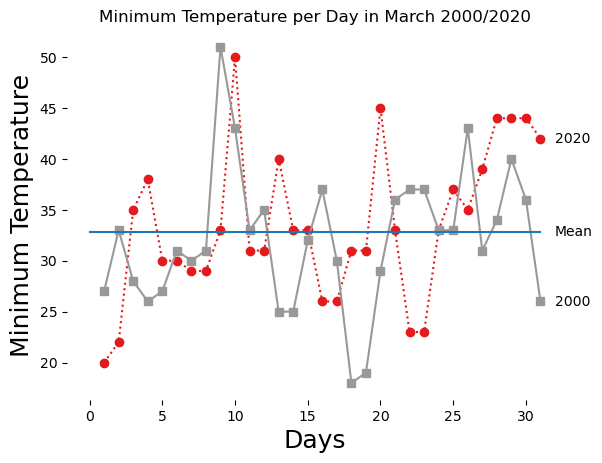

In [16]:
import matplotlib.pyplot as plt

# Some data for us to plot
xVals = data[(data.MONTH==3) & (data.YEAR==2020)].DAY # independent
yVals = data[(data.MONTH==3) & (data.YEAR==2020)].TMIN # dependent
zVals = data[(data.MONTH==3) & (data.YEAR==2000)].TMIN # dependent



# Creat the figure
fig, ax = plt.subplots(1)
colors = brewer.get_cmap('Set1',2)
# Add our data and change the color, marker type and linestyle
ax.plot( xVals, yVals, marker='o', linestyle=':',  label = '2020', color=colors(0))
ax.plot( xVals, zVals, marker='s', linestyle='-',  label = '2000', color=colors(1))

###################################################
meanValue = pd.concat([yVals,zVals]).mean()
plt.plot([0, 31],[meanValue, meanValue]) # [x1, x2], [y1, y2]
###################################################
# Add labels, a title and grid lines to the plot
ax.set_xlabel( 'Days' , fontsize=18)
ax.set_ylabel( 'Minimum Temperature' , fontsize=18)
plt.title( 'Minimum Temperature per Day in March 2000/2020' )

ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['bottom'].set_visible(False)
ax.spines['left'].set_visible(False)

ax.text(32, yVals.iloc[-1], '2020', horizontalalignment='left', verticalalignment='center')
ax.text(32, zVals.iloc[-1], '2000', horizontalalignment='left', verticalalignment='center')
ax.text(32, meanValue, 'Mean', horizontalalignment='left', verticalalignment='center')

# Show the figure (here in Jupyter)
plt.show( fig )
plt.close( fig )

Changing the size of the figure.

/tmp/ipykernel_3521/3296956998.py:17: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed in 3.11. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap()`` or ``pyplot.get_cmap()`` instead.
  colors = brewer.get_cmap('Set1',2)


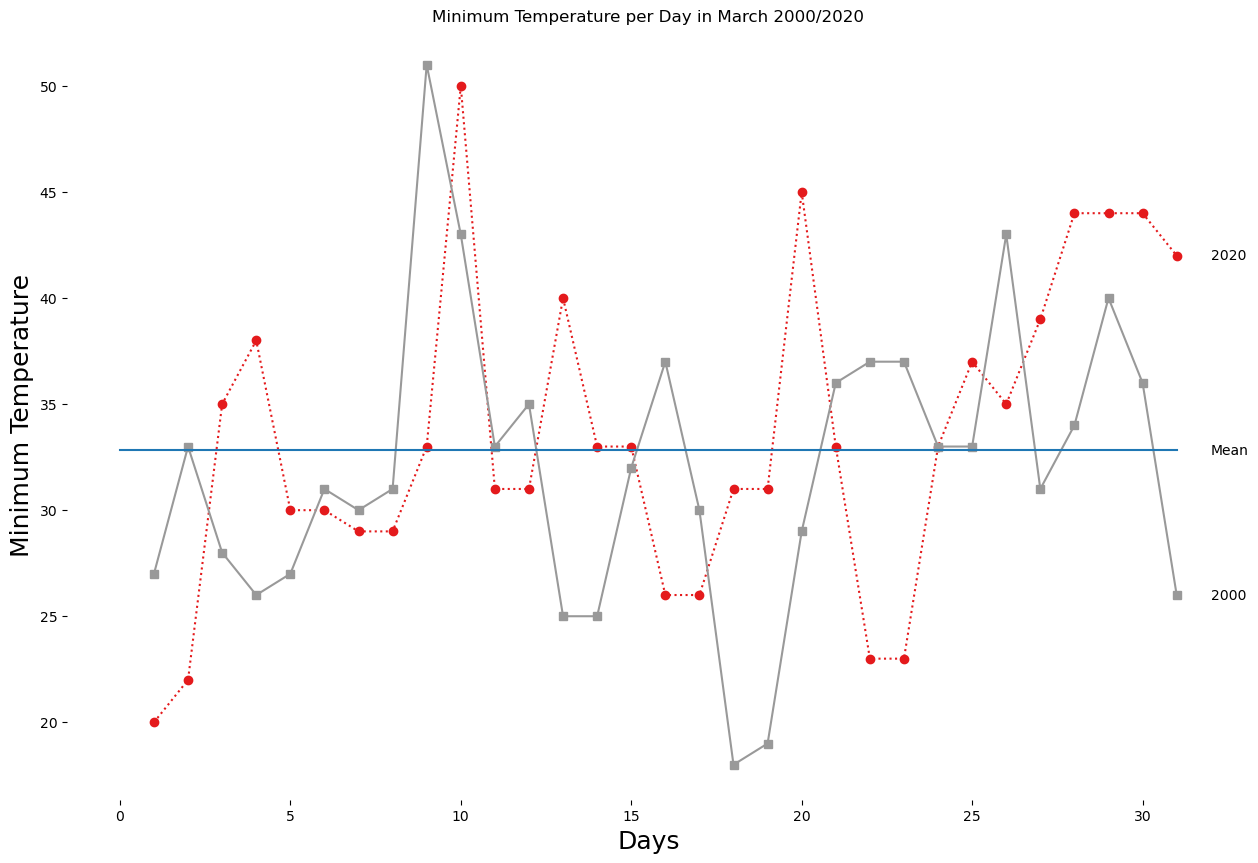

In [17]:
import matplotlib.pyplot as plt

###################################################
plt.rcParams["figure.figsize"] = (15,10)
#plt.rcParams["figure.figsize"] = (8,6)
###################################################

# Some data for us to plot
xVals = data[(data.MONTH==3) & (data.YEAR==2020)].DAY # independent
yVals = data[(data.MONTH==3) & (data.YEAR==2020)].TMIN # dependent
zVals = data[(data.MONTH==3) & (data.YEAR==2000)].TMIN # dependent



# Creat the figure
fig, ax = plt.subplots(1)
colors = brewer.get_cmap('Set1',2)
# Add our data and change the color, marker type and linestyle
ax.plot( xVals, yVals, marker='o', linestyle=':',  label = '2020', color=colors(0))
ax.plot( xVals, zVals, marker='s', linestyle='-',  label = '2000', color=colors(1))

meanValue = pd.concat([yVals,zVals]).mean()
plt.plot([0, 31],[meanValue, meanValue]) # [x1, x2], [y1, y2]

# Add labels, a title and grid lines to the plot
ax.set_xlabel( 'Days' , fontsize=18)
ax.set_ylabel( 'Minimum Temperature' , fontsize=18)
plt.title( 'Minimum Temperature per Day in March 2000/2020' )

ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['bottom'].set_visible(False)
ax.spines['left'].set_visible(False)

ax.text(32, yVals.iloc[-1], '2020', horizontalalignment='left', verticalalignment='center')
ax.text(32, zVals.iloc[-1], '2000', horizontalalignment='left', verticalalignment='center')
ax.text(32, meanValue, 'Mean', horizontalalignment='left', verticalalignment='center')

# Show the figure (here in Jupyter)
plt.show( fig )
plt.close( fig )



first = January, February, and March
second = April, May and June
third = July, August, and September
fourth = October, November, and December

To update the figure size and font, use rcParams:

plt.rcParams["figure.figsize"] = (14,12)

plt.rcParams.update({'font.size': 12})

For the color, I used colorbrewer, set "tab20"

The y-limits were all [ 20 , 100 ]

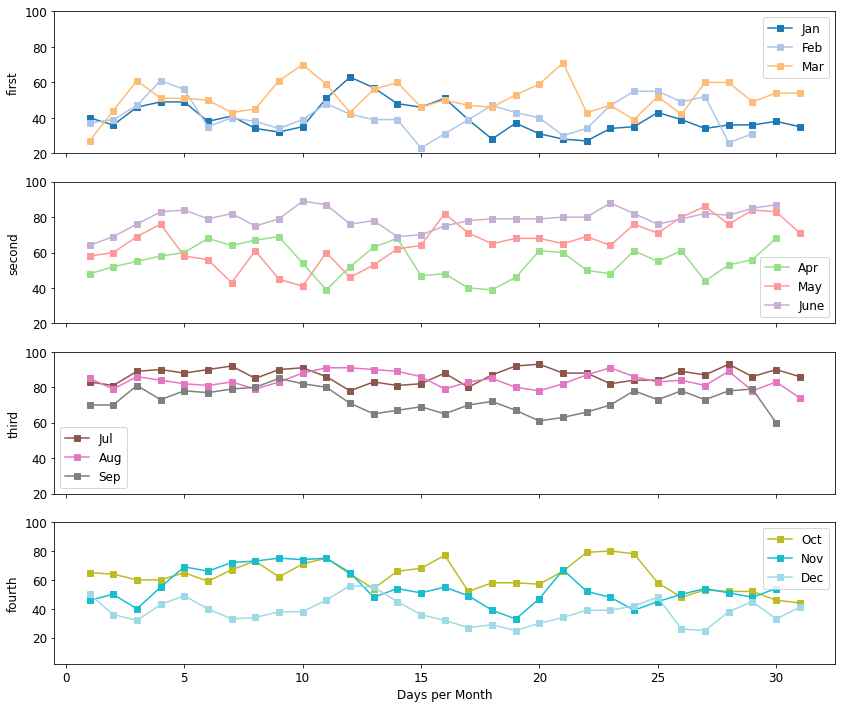